In [25]:
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import requests
from dotenv import load_dotenv
import os
import numpy as np
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [6]:
tickers = input('what do you want to invest in?').split()

what do you want to invest in? AAPL BTC-USD ETH-USD TSLA FB


In [7]:
capital = input('how much do you have to invest?')

how much do you have to invest? 100000


In [9]:
df_portfolio = yf.download(tickers, start='2019-05-07', end='2021-05-07')

[*********************100%***********************]  5 of 5 completed


In [10]:
df_portfolio.head()

Adj Close                                                  \
                 AAPL      BTC-USD     ETH-USD          FB       TSLA   
Date                                                                    
2019-05-07  49.590477  5829.501465  169.798660  189.770004  49.411999   
2019-05-08  49.600250  5982.457520  170.948166  189.539993  48.967999   
2019-05-09  49.067337  6174.528809  170.289307  188.649994  48.396000   
2019-05-10  48.387592  6378.849121  173.142746  188.339996  47.903999   
2019-05-11        NaN  7204.771484  194.304337         NaN        NaN   

                Close                                                  ...  \
                 AAPL      BTC-USD     ETH-USD          FB       TSLA  ...   
Date                                                                   ...   
2019-05-07  50.715000  5829.501465  169.798660  189.770004  49.411999  ...   
2019-05-08  50.724998  5982.457520  170.948166  189.539993  48.967999  ...   
2019-05-09  50.180000  6174.528809  170.289307  188.649994  48.396000  ...   
2019-05-10  49.294998  6378.849121  173.142746  188.339996  47.903999  ...   
2019-05-11        NaN  7204.771484  194.304337         NaN        NaN  ...   

                 Open                                                  \
                 AAPL      BTC-USD     ETH-USD          FB       TSLA   
Date                                                                    
2019-05-07  51.470001  5745.599121  172.427277  192.539993  51.360001   
2019-05-08  50.474998  5849.481445  169.904205  189.389999  49.388000   
2019-05-09  50.099998  5982.316406  170.951874  187.199997  48.400002   
2019-05-10  49.355000  6175.822754  170.312973  188.250000  47.950001   
2019-05-11        NaN  6379.666992  173.139313         NaN        NaN   

                 Volume                                                      
                   AAPL       BTC-USD       ETH-USD          FB        TSLA  
Date                                                                         
2019-05-07  155054800.0  1.802641e+10  8.411140e+09  16253000.0  50657000.0  
2019-05-08  105358000.0  1.532061e+10  6.416570e+09  12505700.0  30882000.0  
2019-05-09  139634400.0  1.678465e+10  6.546914e+09  12967000.0  33557000.0  
2019-05-10  164834800.0  1.941988e+10  8.036919e+09  12578500.0  35041500.0  
2019-05-11          NaN  2.886756e+10  1.257833e+10         NaN         NaN  

[5 rows x 30 columns]

In [14]:
df_closing = df_portfolio['Adj Close'].dropna()
df_closing.tail(10)

,AAPL,BTC-USD,ETH-USD,FB,TSLA
Date,,,,,
2021-04-23,134.092239,51093.652344,2363.586182,301.130005,729.400024
2021-04-26,134.491562,54021.753906,2534.481689,303.040009,738.200012
2021-04-27,134.162109,55033.117188,2662.865234,303.570007,704.739990
2021-04-28,133.353485,54824.703125,2746.380127,307.100006,694.400024
2021-04-29,133.253662,53555.109375,2756.876953,329.510010,677.000000
2021-04-30,131.237091,57750.175781,2773.207031,325.079987,709.440002
2021-05-03,132.315247,57200.292969,3431.086182,322.579987,684.900024
2021-05-04,127.633202,53333.539062,3253.629395,318.359985,673.599976
2021-05-05,127.882790,57424.007812,3522.783203,315.019989,670.940002


In [15]:
# STEP 1 - show the investor the risk assessment of investing in these assets
# retrieve data set
# calculate percent change (daily returns)
# 1st visualization - plot daily returns, possibly plot correlatiob of assets as well
# calculate std from daily returns 
# calculate annualized std then rank assets in terms of riskiness
# calculate sharp ratios 
# 2nd visualization - plot annualized standard deviations and sharp ratios

daily_returns = df_closing.pct_change().dropna()
daily_returns.head()

,AAPL,BTC-USD,ETH-USD,FB,TSLA
Date,,,,,
2019-05-08,0.000197,0.026238,0.006770,-0.001212,-0.008986
2019-05-09,-0.010744,0.032106,-0.003854,-0.004696,-0.011681
2019-05-10,-0.013853,0.033091,0.016756,-0.001643,-0.010166
2019-05-13,-0.058120,0.225129,0.136902,-0.036105,-0.052229
2019-05-14,0.015830,0.022969,0.103138,-0.004462,0.023347


<AxesSubplot:xlabel='Date'>

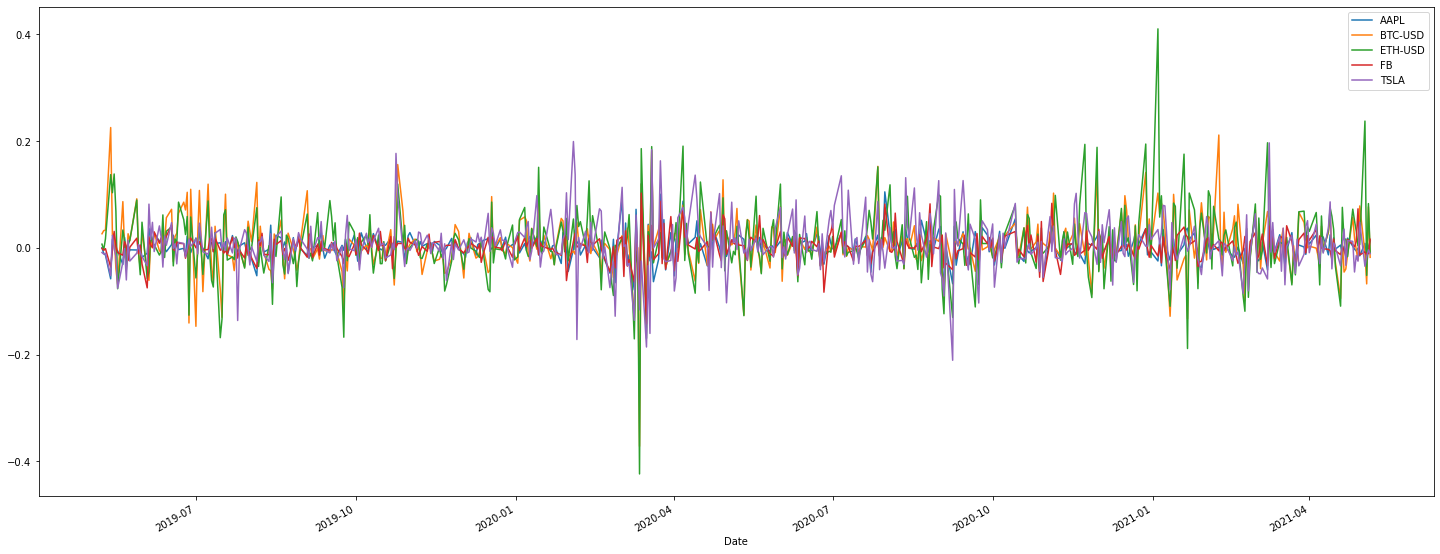

In [16]:
daily_returns.plot.line(figsize=(25,10))

<AxesSubplot:>

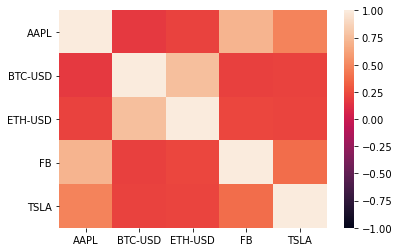

In [17]:
correlations = daily_returns.corr()
sns.heatmap(correlations, vmin=-1, vmax=1)

In [18]:
std_deviations = daily_returns.std()
annualized_std = (std_deviations * np.sqrt(252)).sort_values(ascending=False)
annualized_std

ETH-USD    0.975104
BTC-USD    0.771639
TSLA       0.752690
FB         0.380993
AAPL       0.379706
dtype: float64

<AxesSubplot:>

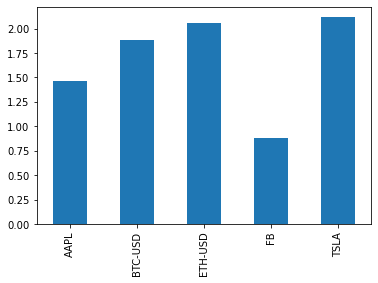

In [19]:
sharpe_ratios = ((daily_returns.mean() * 252)) / (daily_returns.std() * np.sqrt(252))
sharpe_ratios.plot.bar()

In [20]:
# low risk portfolio - [1st - 5%, 2nd - 10%, 3rd - 15%, 4th- 20%, 5th - 50%] -- 80% investment , 20% lending
# medium risk portfolio - [1st - 10%, 2nd - 15%, 3rd - 20%, 4th- 25%, 5th - 30%] -- 60% investment , 40% lending
# high risk portfolio - [1st - 30%, 2nd - 25%, 3rd -20%, 4th- 15%, 5th - 10%] -- 50% investment , 50% lending
# ex. weights = [.05, .1, .15, .2, .5] --> daily_returns.dot(weights)


low_risk_weights = [.05, .1, .15, .2, .5]
med_risk_weights = [.1, .15, .2, .25, .3]
high_risk_weights = [.3, .25, .2, .15, .1]
volatitly_ranks = annualized_std.index.to_list()
print(volatitly_ranks)
ordered_volatility_df = pd.concat([daily_returns[volatitly_ranks[0]], daily_returns[volatitly_ranks[1]],daily_returns[volatitly_ranks[2]],daily_returns[volatitly_ranks[3]],daily_returns[volatitly_ranks[4]]], axis=1, join='inner')
low_risk_porfolio = ordered_volatility_df.dot(low_risk_weights)
med_risk_porfolio = ordered_volatility_df.dot(med_risk_weights)
high_risk_porfolio = ordered_volatility_df.dot(high_risk_weights)

['ETH-USD', 'BTC-USD', 'TSLA', 'FB', 'AAPL']


<AxesSubplot:xlabel='Date'>

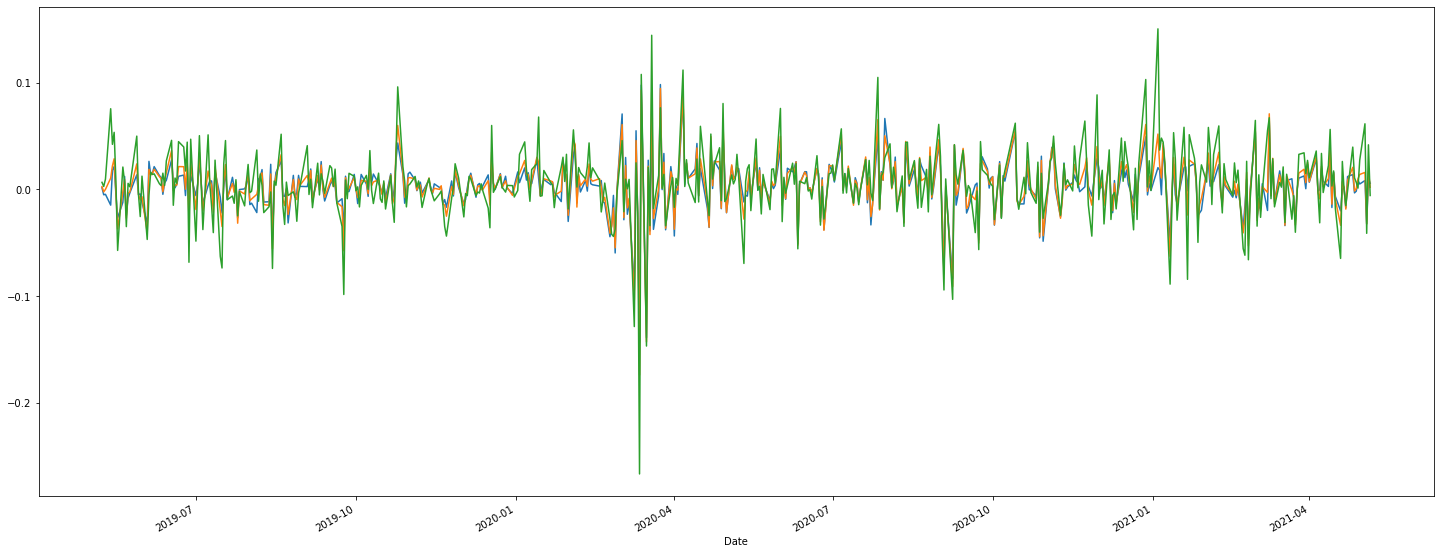

In [21]:
ax = low_risk_porfolio.plot.line(figsize=(25,10))
med_risk_porfolio.plot.line(ax=ax)
high_risk_porfolio.plot.line(ax=ax)

<AxesSubplot:xlabel='Date'>

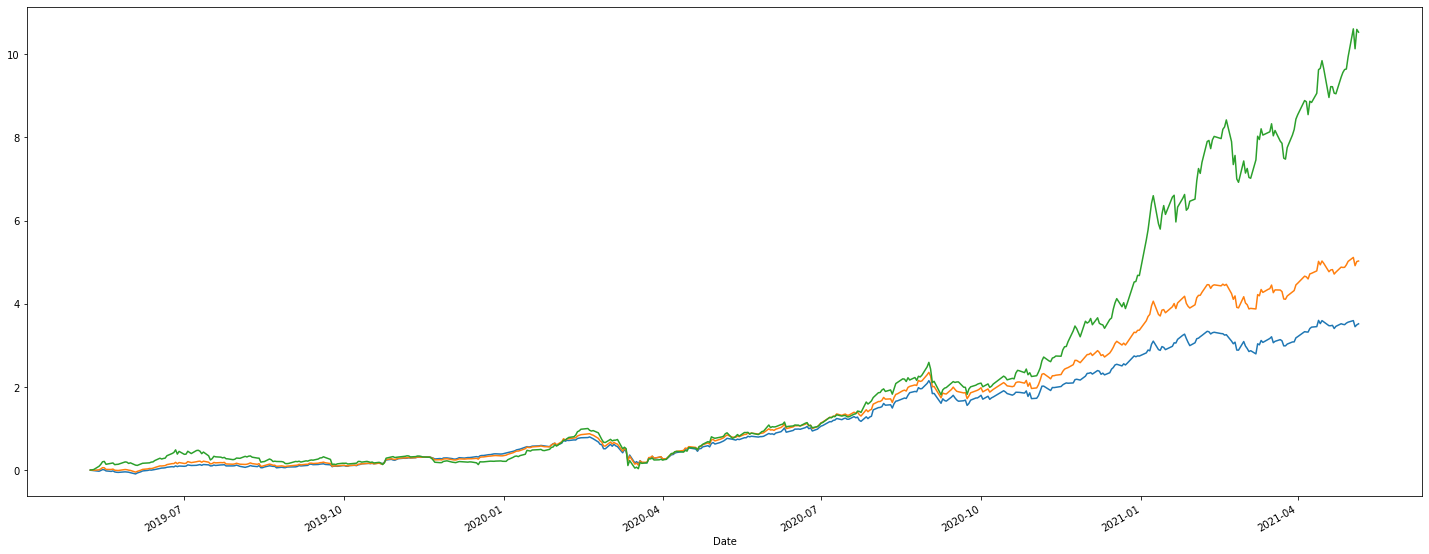

In [23]:
# STEP 3 - calculate cumulative returns from each portfolio
# calculate returns for each risk scenario using different weights
# calculate cumulative returns for each scenario
# show and calculate monte carlo simulation
# 3rd visualization - plot cumulative returns

low_risk_cumulative_returns = (1 + low_risk_porfolio).cumprod() - 1
med_risk_cumulative_returns = (1 + med_risk_porfolio).cumprod() - 1
high_risk_cumulative_returns = (1 + high_risk_porfolio).cumprod() - 1
ax = low_risk_cumulative_returns.plot(figsize=(25,10))
med_risk_cumulative_returns.plot(ax=ax)
high_risk_cumulative_returns.plot(ax=ax)

In [40]:
#pd.concat({'Foo': df}, names=['Firstlevel'])
ordered_close_by_volatility_df = pd.concat([df_closing[volatitly_ranks[0]], df_closing[volatitly_ranks[1]],df_closing[volatitly_ranks[2]],df_closing[volatitly_ranks[3]],df_closing[volatitly_ranks[4]]], axis=1, join='inner')
multi_level = pd.concat([ordered_close_by_volatility_df], axis=1, keys=['close']).swaplevel(0,1,1)
multi_level.head()

,ETH-USD,BTC-USD,TSLA,FB,AAPL
,close,close,close,close,close
Date,,,,,
2019-05-07,169.798660,5829.501465,49.411999,189.770004,49.590477
2019-05-08,170.948166,5982.457520,48.967999,189.539993,49.600250
2019-05-09,170.289307,6174.528809,48.396000,188.649994,49.067337
2019-05-10,173.142746,6378.849121,47.903999,188.339996,48.387592
2019-05-13,196.846283,7814.915039,45.402000,181.539993,45.575329


In [45]:
MC_low_risk = MCSimulation(
    portfolio_data = multi_level,
    weights = low_risk_weights,
    num_simulation = 100,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_low_risk.portfolio_data.head()

ETH-USD                   BTC-USD                    TSLA  \
                 close daily_return        close daily_return      close   
Date                                                                       
2019-05-07  169.798660          NaN  5829.501465          NaN  49.411999   
2019-05-08  170.948166     0.006770  5982.457520     0.026238  48.967999   
2019-05-09  170.289307    -0.003854  6174.528809     0.032106  48.396000   
2019-05-10  173.142746     0.016756  6378.849121     0.033091  47.903999   
2019-05-13  196.846283     0.136902  7814.915039     0.225129  45.402000   

                                 FB                    AAPL               
           daily_return       close daily_return      close daily_return  
Date                                                                      
2019-05-07          NaN  189.770004          NaN  49.590477          NaN  
2019-05-08    -0.008986  189.539993    -0.001212  49.600250     0.000197  
2019-05-09    -0.011681  188.649994    -0.004696  49.067337    -0.010744  
2019-05-10    -0.010166  188.339996    -0.001643  48.387592    -0.013853  
2019-05-13    -0.052229  181.539993    -0.036105  45.575329    -0.058120

In [46]:
MC_med_risk = MCSimulation(
    portfolio_data = multi_level,
    weights = med_risk_weights,
    num_simulation = 100,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_med_risk.portfolio_data.head()

ETH-USD                   BTC-USD                    TSLA  \
                 close daily_return        close daily_return      close   
Date                                                                       
2019-05-07  169.798660          NaN  5829.501465          NaN  49.411999   
2019-05-08  170.948166     0.006770  5982.457520     0.026238  48.967999   
2019-05-09  170.289307    -0.003854  6174.528809     0.032106  48.396000   
2019-05-10  173.142746     0.016756  6378.849121     0.033091  47.903999   
2019-05-13  196.846283     0.136902  7814.915039     0.225129  45.402000   

                                 FB                    AAPL               
           daily_return       close daily_return      close daily_return  
Date                                                                      
2019-05-07          NaN  189.770004          NaN  49.590477          NaN  
2019-05-08    -0.008986  189.539993    -0.001212  49.600250     0.000197  
2019-05-09    -0.011681  188.649994    -0.004696  49.067337    -0.010744  
2019-05-10    -0.010166  188.339996    -0.001643  48.387592    -0.013853  
2019-05-13    -0.052229  181.539993    -0.036105  45.575329    -0.058120

In [47]:
MC_high_risk = MCSimulation(
    portfolio_data = multi_level,
    weights = high_risk_weights,
    num_simulation = 100,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_high_risk.portfolio_data.head()

ETH-USD                   BTC-USD                    TSLA  \
                 close daily_return        close daily_return      close   
Date                                                                       
2019-05-07  169.798660          NaN  5829.501465          NaN  49.411999   
2019-05-08  170.948166     0.006770  5982.457520     0.026238  48.967999   
2019-05-09  170.289307    -0.003854  6174.528809     0.032106  48.396000   
2019-05-10  173.142746     0.016756  6378.849121     0.033091  47.903999   
2019-05-13  196.846283     0.136902  7814.915039     0.225129  45.402000   

                                 FB                    AAPL               
           daily_return       close daily_return      close daily_return  
Date                                                                      
2019-05-07          NaN  189.770004          NaN  49.590477          NaN  
2019-05-08    -0.008986  189.539993    -0.001212  49.600250     0.000197  
2019-05-09    -0.011681  188.649994    -0.004696  49.067337    -0.010744  
2019-05-10    -0.010166  188.339996    -0.001643  48.387592    -0.013853  
2019-05-13    -0.052229  181.539993    -0.036105  45.575329    -0.058120

In [48]:
MC_low_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006856,1.028685,0.995355,0.980958,1.005641,1.002641,1.020947,1.011244,1.021965,1.014160,...,1.011957,0.971130,0.990709,0.991488,1.000381,0.988325,0.976180,1.011583,1.010657,1.005303
2,0.991587,1.020736,0.978395,0.966750,0.993020,1.000219,1.018351,1.017057,1.072256,1.007801,...,1.018991,0.956446,0.998911,0.988184,0.994103,0.982239,0.959203,1.032611,1.026120,1.013295
3,0.972311,1.034017,0.974044,0.995854,0.989005,0.995143,1.042000,1.026747,1.052293,1.026864,...,1.009347,0.956074,1.018468,1.004322,1.020476,0.986118,0.994891,1.027540,1.048098,1.020773
4,0.953837,1.022722,0.960829,0.984414,0.998447,1.008071,1.024330,1.043126,1.067237,1.041316,...,1.045755,0.936438,1.026875,0.997454,1.044819,0.973025,0.983059,1.013650,1.053022,1.030458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,25.351940,96.397614,73.545472,84.212120,60.475730,62.801098,22.959492,48.518542,35.392838,33.626501,...,52.916096,134.452832,165.545160,31.318411,47.880024,18.080197,67.085975,55.450373,72.788780,109.943544
1257,25.388248,100.286271,75.215003,83.718759,60.077073,61.629605,23.170369,48.403239,36.042136,33.206043,...,53.908265,135.090859,168.451569,31.974480,47.195997,18.313817,66.366817,56.016516,73.426740,109.722106
1258,25.412031,99.853283,76.220167,84.336915,61.004467,62.500017,22.783446,48.755269,35.375651,33.157119,...,54.251997,132.102801,165.603730,32.198493,47.318337,18.407311,65.316147,55.340139,74.320602,112.165202
1259,24.328868,96.418784,75.363445,87.127056,62.467586,63.712292,22.778745,48.422988,35.476250,33.739050,...,52.775140,133.955500,164.004136,32.834358,47.614401,18.594506,65.863734,55.509670,74.418753,113.759783


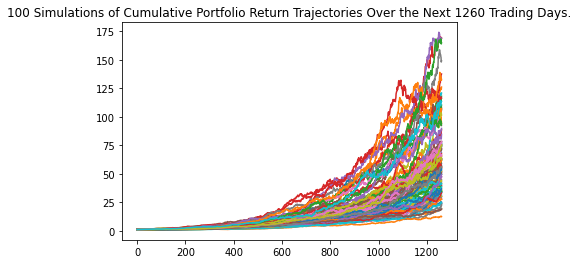

In [49]:
low_risk_plot = MC_low_risk.plot_simulation()

In [50]:
low_risk_table = MC_low_risk.summarize_cumulative_return()
print(low_risk_table)

count           100.000000
mean             63.273241
std              35.394950
min              12.381138
25%              35.422552
50%              56.001213
75%              76.788898
max             169.096640
95% CI Lower     19.444185
95% CI Upper    157.490570
Name: 1260, dtype: float64


In [51]:
MC_med_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004414,0.997461,0.969890,1.003255,0.973209,1.012483,0.985060,1.003849,1.014034,1.012163,...,1.027528,1.016056,0.984972,0.989954,0.974925,1.018062,1.009558,1.011280,1.002116,1.016229
2,1.031761,0.995346,0.988404,1.021183,0.965839,0.981026,0.992170,1.013459,1.006744,1.008950,...,1.031987,0.993132,0.986081,0.995734,1.003122,1.006099,1.012245,1.000964,0.995986,1.037452
3,1.049512,0.999876,0.954417,1.044626,0.987008,0.976448,0.989940,1.009480,1.006700,1.023222,...,1.075716,0.971747,1.018767,1.024111,1.010666,1.005005,1.012204,1.016365,1.006226,1.041300
4,1.070833,1.022290,0.950528,1.048702,1.003850,0.953998,0.988500,0.989716,1.032834,1.024046,...,1.074488,0.969315,0.982982,1.018641,1.012351,1.015945,1.028391,1.020385,1.012594,1.045132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,138.044483,150.064750,75.218810,83.465463,399.337767,82.456867,139.308173,82.146670,139.838684,59.630150,...,182.058062,15.089004,137.566647,121.411994,70.363122,104.506433,158.096805,131.514973,30.595761,112.065114
1257,139.168297,148.569262,75.250468,82.792410,403.322791,84.560714,141.777038,81.659161,136.423965,59.850339,...,188.838556,15.757359,137.420870,125.416452,71.408307,103.694871,157.399198,137.463608,31.430085,109.683892
1258,140.195435,151.363022,75.792647,84.116327,405.226680,84.226437,141.580973,83.870736,138.959588,60.143003,...,189.103946,15.760667,136.622048,125.537771,71.627975,104.823691,158.272381,139.359144,32.158393,107.118961
1259,142.018481,154.516503,78.123581,84.003567,404.801320,88.114774,144.877619,85.207404,137.899937,60.261979,...,190.410297,15.593072,136.648818,129.190215,71.083550,106.356605,160.894381,138.705127,32.688109,107.620952


In [52]:
med_risk_table = MC_med_risk.summarize_cumulative_return()
print(med_risk_table)

count           100.000000
mean            124.988759
std              82.474707
min              15.749822
25%              68.175795
50%             103.281941
75%             162.233637
max             526.127252
95% CI Lower     27.863118
95% CI Upper    336.010760
Name: 1260, dtype: float64


In [53]:
MC_high_risk.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.029396,0.981719,1.003506,0.966195,1.013362,0.989959,1.029474,0.968577,0.991081,1.001746,...,1.000019,0.980741,0.965853,1.002067,1.005384,1.034153,1.030174,1.004566,0.983535,0.961572
2,1.048231,0.930577,0.991840,1.003343,1.074483,0.991235,1.031077,0.949186,0.970550,0.990360,...,0.999058,1.016025,0.995251,0.965439,1.013190,1.030639,1.046793,0.992052,0.965462,0.998268
3,1.046541,0.954497,1.043659,1.069162,1.052508,1.009537,1.012285,0.976194,0.978049,0.993766,...,1.016314,1.049504,1.081154,1.035234,1.044110,1.021121,1.105731,0.960143,1.008188,1.001655
4,1.033248,0.946664,1.007255,1.079643,1.062954,1.008322,0.991148,0.946020,0.938608,0.978501,...,1.025312,1.093293,1.073619,1.049422,1.055916,1.008375,1.141349,0.954105,1.018346,0.988255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,838.017680,227.564612,1150.254442,1231.143407,2144.788464,316.501676,1807.360770,1251.156514,4341.232070,433.606806,...,599.370425,779.413506,1935.625175,2662.472387,352.508648,1689.563028,1174.456202,619.903891,405.217453,605.427301
1257,857.172676,231.797210,1148.561129,1235.442686,2157.902428,323.617616,1791.586350,1287.691790,4386.891612,412.785624,...,581.840840,806.081279,1938.449950,2765.059271,372.290741,1695.184127,1206.725514,634.471107,415.881175,608.900437
1258,868.606732,237.233552,1143.004741,1219.505318,2082.407951,321.150680,1804.245007,1253.079113,4340.052522,409.239733,...,571.399608,793.426414,1985.891475,2756.452159,370.685155,1712.869016,1205.038684,645.773778,411.603149,575.215178
1259,863.318208,234.324435,1094.382222,1217.526874,2024.983678,318.484099,1810.221163,1254.539727,4345.744412,410.601460,...,571.301998,828.774797,2074.998788,2729.255432,375.412468,1720.725501,1192.798566,653.306275,405.462524,560.048949


In [54]:
high_risk_table = MC_high_risk.summarize_cumulative_return()
print(high_risk_table)

count            100.000000
mean             946.573546
std              866.597837
min              117.127626
25%              375.752521
50%              707.312227
75%             1171.561185
max             5407.449679
95% CI Lower     183.220244
95% CI Upper    3179.316988
Name: 1260, dtype: float64


In [56]:
 # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
low_risk_ci_lower = round(low_risk_table[8]*15000,2)
low_risk_ci_upper = round(low_risk_table[9]*15000,2)
med_risk_ci_lower = round(med_risk_table[8]*15000,2)
med_risk_ci_upper = round(med_risk_table[9]*15000,2)
high_risk_ci_lower = round(high_risk_table[8]*15000,2)
high_risk_ci_upper = round(high_risk_table[9]*15000,2)
# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the low risk portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${low_risk_ci_lower} and ${low_risk_ci_upper}.")

print(f"There is a 95% chance that an initial investment of $15,000 in the medium risk portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${med_risk_ci_lower} and ${med_risk_ci_upper}.")

print(f"There is a 95% chance that an initial investment of $15,000 in the high risk portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${high_risk_ci_lower} and ${high_risk_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the low risk portfolio over the next 5 years will end within in the range of $291662.78 and $2362358.54.
There is a 95% chance that an initial investment of $15,000 in the medium risk portfolio over the next 5 years will end within in the range of $417946.77 and $5040161.4.
There is a 95% chance that an initial investment of $15,000 in the high risk portfolio over the next 5 years will end within in the range of $2748303.66 and $47689754.82.
